In [10]:
import pandas as pd
import collections
from rdkit import Chem

### DAY 1 Tasks:

1) Оставить только столбцы Canonicalized Reaction и Yield, остальные удалить
2) Привести все реакции к виду: реагенты>>продукты. Если в реакции есть какое-то условие между скобочками (реагенты>условие>продукты), то это условие надо удалить, чтобы осталось просто две скобочки везде
3) Посмотреть сколько реакций содержат 1/2/3 и т.д. реагентов (например 100 реакций с одним реагентов, 500 с двумя и т.д.), напоминаю что реагенты разделены между собой точкой!
4) На основании третьего пункта сделать вывод каких реакций больше и оставить только их (по идее у вас должны остаться реакции только с одним либо с двумя реагентами)
5) Разделить реагенты и продукты на столбики, т.е. у вас добавятся столбцы "reactant_1", "reactant_2", "product"

In [11]:
def find_nth(haystack:str, needle:str, n:int) -> str:
    """
    usage:
    haystack - строка в которой ищем вхождение
    needle - что ищем
    n - на какой позиции
    //если на n позиции не найден элемент -> -1
    """
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

def smiles_parse(smiles:str) -> str:
    """
    Парсим smiles:
    "CC(C)(C)NNC(C)(C#N)C1CC1.O=C1CCCCCC1>CC(=O)C1CC1>CC(C)(C)NNC1(C#N)CCCCCC1" ->
    "CC(C)(C)NNC(C)(C#N)C1CC1.O=C1CCCCCC1>>CC(C)(C)NNC1(C#N)CCCCCC1"
    """
    return smiles[:find_nth(smiles, ">", 1)] +">"+ smiles[find_nth(smiles, ">", 2):]

def task2_split(task2:str) -> str:
    """
    TASK 5:
    5) Разделить реагенты и продукты на столбики, т.е. у вас добавятся столбцы "reactant_1", "reactant_2", "product"
    """
    result = []
    product = task2[find_nth(task2, ">",2)+1:]

    if find_nth(task2, ".", 1) != -1:
        result.append(task2[:find_nth(task2, ".", 1)])
        result.append(task2[find_nth(task2, ".", 1) + 1:find_nth(task2, ">", 1)])
    else:
        result.append(task2[:find_nth(task2, ">", 1)])
        result.append(None)

    result.append(product)
    return result
    


#TASK 1
data = pd.read_csv("data.csv",  sep="\t")
data.drop(['Unnamed: 0', 'myID', 'Source', 'Target', 'OriginalReaction'], axis=1, inplace=True)
print("Размер всего датасета:", len(data))

#TASK 2
data["task2"] =  data["CanonicalizedReaction"].apply(smiles_parse)

#TASK 3
data["reactants"] = data["task2"].apply(lambda x: x[:x.find(">")])#реагенты
data["task3"] = data["reactants"].apply(lambda x: str.count(x, "."))
print(collections.Counter(data["task3"]))

#TASK 4
print("Больше всего реакций с 1 и 2 реагентами. Оставляем их")
data = data[data["task3"]<2]

# #TASK 5
data["reactant_1"], data["reactant_2"], data["product"] = zip(*data["task2"].apply(task2_split))
display(data)

Размер всего датасета: 26404
Counter({1: 17895, 0: 6736, 2: 1441, 3: 282, 4: 46, 5: 4})
Больше всего реакций с 1 и 2 реагентами. Оставляем их


,CanonicalizedReaction,Yield,task2,reactants,task3,reactant_1,reactant_2,product
0,CC(C)(C)NNC(C)(C#N)C1CC1.O=C1CCCCCC1>CC(=O)C1C...,95.0,CC(C)(C)NNC(C)(C#N)C1CC1.O=C1CCCCCC1>>CC(C)(C)...,CC(C)(C)NNC(C)(C#N)C1CC1.O=C1CCCCCC1,1,CC(C)(C)NNC(C)(C#N)C1CC1,O=C1CCCCCC1,CC(C)(C)NNC1(C#N)CCCCCC1
1,CC(C)N.O=C1CCC(c2ccc(OCC3CO3)cc2)=NN1>CO>CC(C)...,100.0,CC(C)N.O=C1CCC(c2ccc(OCC3CO3)cc2)=NN1>>CC(C)NC...,CC(C)N.O=C1CCC(c2ccc(OCC3CO3)cc2)=NN1,1,CC(C)N,O=C1CCC(c2ccc(OCC3CO3)cc2)=NN1,CC(C)NCC(O)COc1ccc(C2=NNC(=O)CC2)cc1
2,CO.O=C(O)CCC(=O)c1ccccc1O>Cl>COC(=O)CCC(=O)c1c...,98.0,CO.O=C(O)CCC(=O)c1ccccc1O>>COC(=O)CCC(=O)c1ccc...,CO.O=C(O)CCC(=O)c1ccccc1O,1,CO,O=C(O)CCC(=O)c1ccccc1O,COC(=O)CCC(=O)c1ccccc1O
3,CC(=O)c1ccc2c(c1)C(C)(C)c1cccnc1O2.[OH-]>BrBr....,78.6,CC(=O)c1ccc2c(c1)C(C)(C)c1cccnc1O2.[OH-]>>CC1(...,CC(=O)c1ccc2c(c1)C(C)(C)c1cccnc1O2.[OH-],1,CC(=O)c1ccc2c(c1)C(C)(C)c1cccnc1O2,[OH-],CC1(C)c2cc(C(=O)O)ccc2Oc2ncccc21
4,CSc1ccc(N=C=O)cc1.OCc1cccnc1>C1CN2CCN1CC2.c1cc...,95.0,CSc1ccc(N=C=O)cc1.OCc1cccnc1>>CSc1ccc(NC(=O)OC...,CSc1ccc(N=C=O)cc1.OCc1cccnc1,1,CSc1ccc(N=C=O)cc1,OCc1cccnc1,CSc1ccc(NC(=O)OCc2cccnc2)cc1
...,...,...,...,...,...,...,...,...
26399,N#Cc1c(-c2ccc(O)cc2)nn2c1NCCC2c1ccccc1N.O=C(Cl...,62.0,N#Cc1c(-c2ccc(O)cc2)nn2c1NCCC2c1ccccc1N.O=C(Cl...,N#Cc1c(-c2ccc(O)cc2)nn2c1NCCC2c1ccccc1N.O=C(Cl...,1,N#Cc1c(-c2ccc(O)cc2)nn2c1NCCC2c1ccccc1N,O=C(Cl)OCc1ccccc1,N#Cc1c(-c2ccc(O)cc2)nn2c1NCCC2c1ccccc1NC(=O)OC...
26400,NC(=O)c1c(-c2ccc(Oc3ccccc3)cc2)nn2c1ncc1ccc([N...,83.0,NC(=O)c1c(-c2ccc(Oc3ccccc3)cc2)nn2c1ncc1ccc([N...,NC(=O)c1c(-c2ccc(Oc3ccccc3)cc2)nn2c1ncc1ccc([N...,0,NC(=O)c1c(-c2ccc(Oc3ccccc3)cc2)nn2c1ncc1ccc([N...,None,NC(=O)c1c(-c2ccc(Oc3ccccc3)cc2)nn2c1NCc1ccc([N...
26401,CC(C)(C)OC(=O)NCCN1CCN(C/C=C/C(=O)O)CC1.NC(=O)...,58.0,CC(C)(C)OC(=O)NCCN1CCN(C/C=C/C(=O)O)CC1.NC(=O)...,CC(C)(C)OC(=O)NCCN1CCN(C/C=C/C(=O)O)CC1.NC(=O)...,1,CC(C)(C)OC(=O)NCCN1CCN(C/C=C/C(=O)O)CC1,NC(=O)c1c(-c2ccc(Oc3ccccc3)cc2)nn2c1NCC[C@H]2C...,CC(C)(C)OC(=O)NCCN1CCN(C/C=C/C(=O)N2CCC([C@@H]...
26402,Cc1nc2c(OCC3CCCCC3)cccn2c1C(=O)N[C@@H](CN(C)S(...,57.6,Cc1nc2c(OCC3CCCCC3)cccn2c1C(=O)N[C@@H](CN(C)S(...,Cc1nc2c(OCC3CCCCC3)cccn2c1C(=O)N[C@@H](CN(C)S(...,0,Cc1nc2c(OCC3CCCCC3)cccn2c1C(=O)N[C@@H](CN(C)S(...,None,CNC[C@H](NC(=O)c1c(C)nc2c(OCC3CCCCC3)cccn12)c1...


In [13]:
data["task2"][0]

'CC(C)(C)NNC(C)(C#N)C1CC1.O=C1CCCCCC1>>CC(C)(C)NNC1(C#N)CCCCCC1'

### DAY 2 TASKS:

1) Исправить нюансики со вчера и сохранить final_dataset со всеми нужными столбцами
2) Сделать график распределения выходов в получившемся датасете (это лучше сделать в формате ipynb, чтобы можно было выложить код и график одновременно). Тут можно использовать также pandas, вот пример (https://www.codecamp.ru/blog/pandas-histogram/).
3) Написать функцию по переводу smiles молекулы в fingerprint
 (https://stackoverflow.com/questions/57082678/morgan-fingerprint-rdkit)4) Написать функцию по переводу smiles реакции в drfp
 (https://github.com/reymond-group/drfp)5) С помощью этих функций перевести молекулы в fingerprints, реакции в drfp, и сохранить получившийся датасет

In [3]:
#TASK 1
data.drop(['CanonicalizedReaction', 'reactants', 'task3'], axis=1, inplace=True)
data

,Yield,task2,reactant_1,reactant_2,product
0,95.0,CC(C)(C)NNC(C)(C#N)C1CC1.O=C1CCCCCC1>>CC(C)(C)...,CC(C)(C)NNC(C)(C#N)C1CC1,O=C1CCCCCC1,CC(C)(C)NNC1(C#N)CCCCCC1
1,100.0,CC(C)N.O=C1CCC(c2ccc(OCC3CO3)cc2)=NN1>>CC(C)NC...,CC(C)N,O=C1CCC(c2ccc(OCC3CO3)cc2)=NN1,CC(C)NCC(O)COc1ccc(C2=NNC(=O)CC2)cc1
2,98.0,CO.O=C(O)CCC(=O)c1ccccc1O>>COC(=O)CCC(=O)c1ccc...,CO,O=C(O)CCC(=O)c1ccccc1O,COC(=O)CCC(=O)c1ccccc1O
3,78.6,CC(=O)c1ccc2c(c1)C(C)(C)c1cccnc1O2.[OH-]>>CC1(...,CC(=O)c1ccc2c(c1)C(C)(C)c1cccnc1O2,[OH-],CC1(C)c2cc(C(=O)O)ccc2Oc2ncccc21
4,95.0,CSc1ccc(N=C=O)cc1.OCc1cccnc1>>CSc1ccc(NC(=O)OC...,CSc1ccc(N=C=O)cc1,OCc1cccnc1,CSc1ccc(NC(=O)OCc2cccnc2)cc1
...,...,...,...,...,...
26399,62.0,N#Cc1c(-c2ccc(O)cc2)nn2c1NCCC2c1ccccc1N.O=C(Cl...,N#Cc1c(-c2ccc(O)cc2)nn2c1NCCC2c1ccccc1N,O=C(Cl)OCc1ccccc1,N#Cc1c(-c2ccc(O)cc2)nn2c1NCCC2c1ccccc1NC(=O)OC...
26400,83.0,NC(=O)c1c(-c2ccc(Oc3ccccc3)cc2)nn2c1ncc1ccc([N...,NC(=O)c1c(-c2ccc(Oc3ccccc3)cc2)nn2c1ncc1ccc([N...,None,NC(=O)c1c(-c2ccc(Oc3ccccc3)cc2)nn2c1NCc1ccc([N...
26401,58.0,CC(C)(C)OC(=O)NCCN1CCN(C/C=C/C(=O)O)CC1.NC(=O)...,CC(C)(C)OC(=O)NCCN1CCN(C/C=C/C(=O)O)CC1,NC(=O)c1c(-c2ccc(Oc3ccccc3)cc2)nn2c1NCC[C@H]2C...,CC(C)(C)OC(=O)NCCN1CCN(C/C=C/C(=O)N2CCC([C@@H]...
26402,57.6,Cc1nc2c(OCC3CCCCC3)cccn2c1C(=O)N[C@@H](CN(C)S(...,Cc1nc2c(OCC3CCCCC3)cccn2c1C(=O)N[C@@H](CN(C)S(...,None,CNC[C@H](NC(=O)c1c(C)nc2c(OCC3CCCCC3)cccn12)c1...


Text(0, 0.5, 'Ammount')

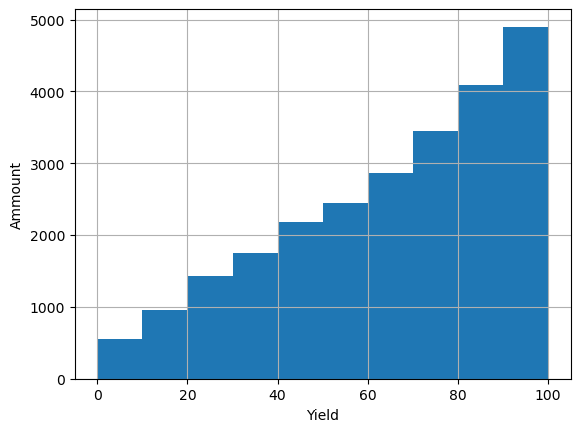

In [8]:
#TASK 2
ax = data["Yield"].hist()
ax.set_xlabel('Yield')
ax.set_ylabel('Ammount')

In [5]:
#TASK 3
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from drfp import DrfpEncoder


def getFingerprint(reactant:str) -> np.array:
    if reactant != None:
        mol = Chem.MolFromSmiles(reactant)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=100)
        return np.array(fp)
    else:
        return np.zeros(100)


def getDrfp(rxn_smiles:str) -> np.array:
    fps = DrfpEncoder.encode(rxn_smiles, n_folded_length=100)
    return np.array(fps).squeeze()


finger1 = pd.DataFrame()
finger2 = pd.DataFrame()
product = pd.DataFrame()
reaction = pd.DataFrame()

finger1_cols = [f"reac1_{i}" for i in range(100)]
finger2_cols = [f"reac2_{i}" for i in range(100)]
product_cols = [f"prod_{i}" for i in range(100)]
reaction_cols = [f"preact_{i}" for i in range(100)]

finger1["arr"] = data["reactant_1"].apply(getFingerprint)
finger2["arr"] = data["reactant_2"].apply(getFingerprint)
product["arr"] = data["product"].apply(getFingerprint)
reaction["arr"] = data["task2"].apply(getDrfp)

finger_1 = pd.DataFrame(finger1["arr"].to_list(), columns=finger1_cols)
finger_2 = pd.DataFrame(finger2["arr"].to_list(), columns=finger2_cols)
product_1 = pd.DataFrame(product["arr"].to_list(), columns=product_cols)
reaction_1 = pd.DataFrame(reaction["arr"].to_list(), columns=reaction_cols)

In [6]:
data.reset_index(drop=True, inplace=True)
finger_1.reset_index(drop=True, inplace=True)
finger_2.reset_index(drop=True, inplace=True)
product_1.reset_index(drop=True, inplace=True)
reaction_1.reset_index(drop=True, inplace=True)

In [12]:
data = pd.concat([data, finger_1, finger_2, product_1, reaction_1], axis=1)
data.drop(['task2', 'reactant_1', 'reactant_2', 'product'], axis=1, inplace=True)
data.to_csv("data_new.csv", index=False)
data

,Yield,reac1_0,reac1_1,reac1_2,reac1_3,reac1_4,reac1_5,reac1_6,reac1_7,reac1_8,...,preact_90,preact_91,preact_92,preact_93,preact_94,preact_95,preact_96,preact_97,preact_98,preact_99
0,95.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,100.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,98.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,78.6,1,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,95.0,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24626,62.0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,1
24627,83.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
24628,58.0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
24629,57.6,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,1,0,0
